<a href="https://colab.research.google.com/github/behnaznikkhah/COVID-19ImpactOnStockMarket/blob/master/VisualizeHeadlinesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

final data null values:  Country        0
Date           0
ActiveCases    0
Deaths         0
dtype: int64
Corona news data before combining strings: 
         Date                                               News
0 2020-04-01  de blasio is no leader when it comes to wuhan ...
1 2020-04-01  20200331 anti quarantine bolsonaro isolates hi...
2 2020-04-01  supply chain tech looks beyond coronavirus wit...
3 2020-04-01  elizabeth warren treasury federal reserve coro...
4 2020-04-01  words to remember canadian newsmakers have the...
      Country       Date  ActiveCases  Deaths  NewCases
56960   World 2020-01-02         27.0     0.0       0.0
56961   World 2020-01-03         44.0     0.0      17.0
56962   World 2020-01-04         44.0     0.0       0.0
56963   World 2020-01-05         59.0     0.0      15.0
56964   World 2020-01-06         59.0     0.0       0.0
56965   World 2020-01-07         59.0     0.0       0.0
56966   World 2020-01-08         59.0     0.0       0.0
56967   World 202

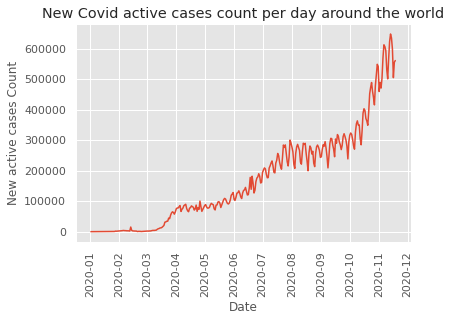

   Month    News
0      1   10758
1      2   35645
2      3  176551
3      4  170783
4      5  101568
        Date  News
0 2020-01-02     2
1 2020-01-04     1
2 2020-01-07     3
3 2020-01-08     1
4 2020-01-09     6
        Date  WordCount
0 2020-01-02   7.500000
1 2020-01-04  13.000000
2 2020-01-07   8.000000
3 2020-01-08   7.000000
4 2020-01-09   8.833333


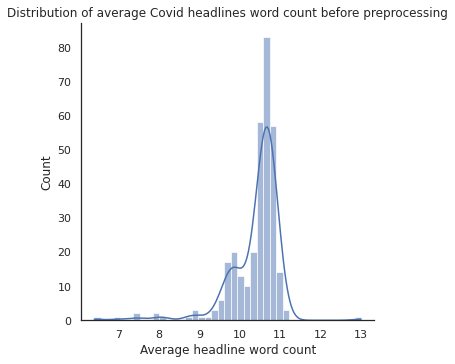

         Date  ... WordCount
12 2020-04-01  ...     62985
25 2020-04-02  ...     63444
38 2020-04-03  ...     57201
52 2020-04-06  ...     49351
65 2020-04-07  ...     55874

[5 rows x 5 columns]


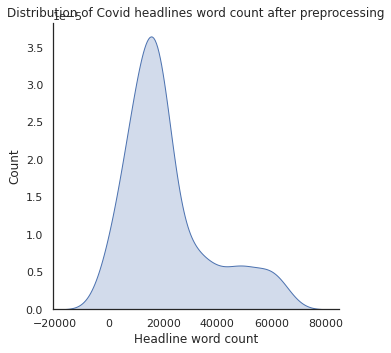

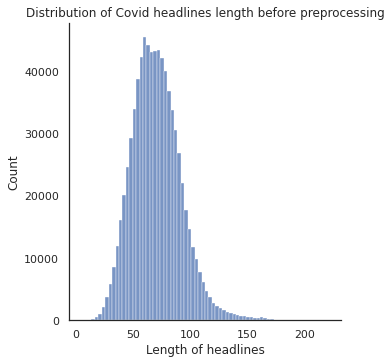

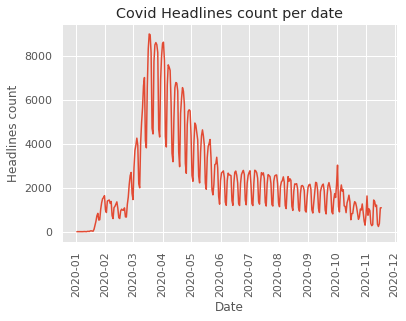

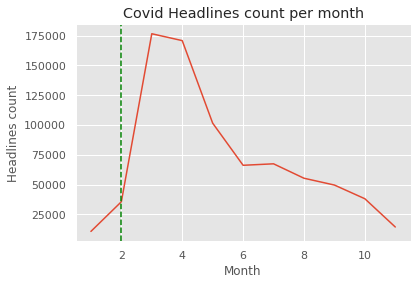

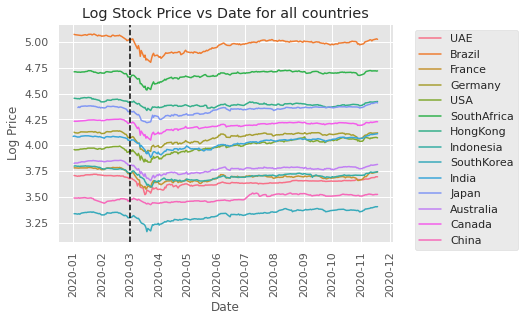

   Country    Vectorizer Classifier   Accuracy
0      UAE  Bag_of_words        KNN  60.809524
1   Brazil  Bag_of_words        KNN  56.890756
2   France  Bag_of_words        KNN  52.523810
3  Germany  Bag_of_words        KNN  56.825397
4      USA  Bag_of_words        KNN  64.777778
Country-wise best accuracies:
         Country    Vectorizer    Classifier   Accuracy
179    Australia  Bag_of_words  RandomForest  57.920635
43        Brazil  Bag_of_words  DecisionTree  56.924370
292       Canada        tf_idf      Adaboost  64.222222
153        China  bigram_model           SGD  62.887701
226       France  bigram_model           SVM  57.619048
143      Germany  bigram_model           SGD  60.634921
20      HongKong  bigram_model           KNN  59.932773
247        India        tf_idf           SVM  67.647059
245    Indonesia        tf_idf           SVM  62.174688
234        Japan  bigram_model           SVM  59.786096
47   SouthAfrica  Bag_of_words  DecisionTree  55.682540
232   SouthKorea

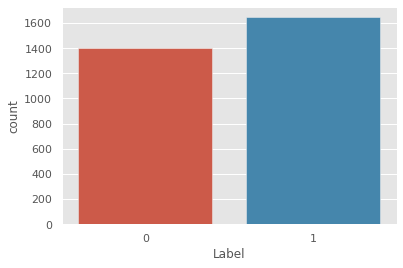

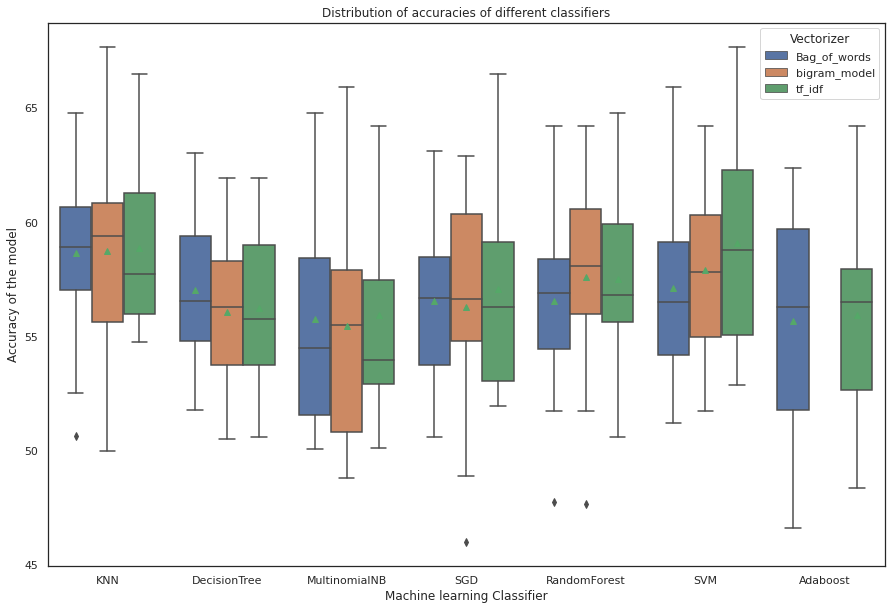

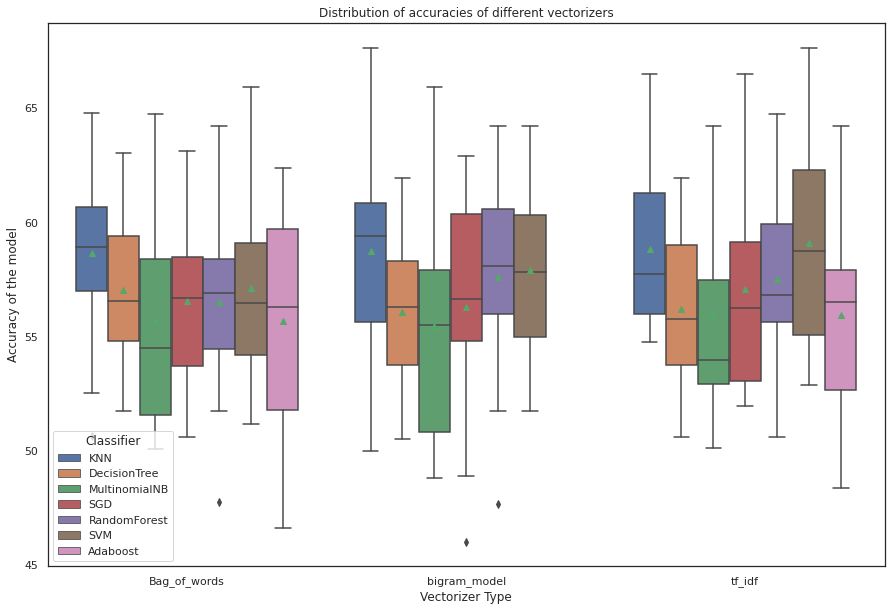

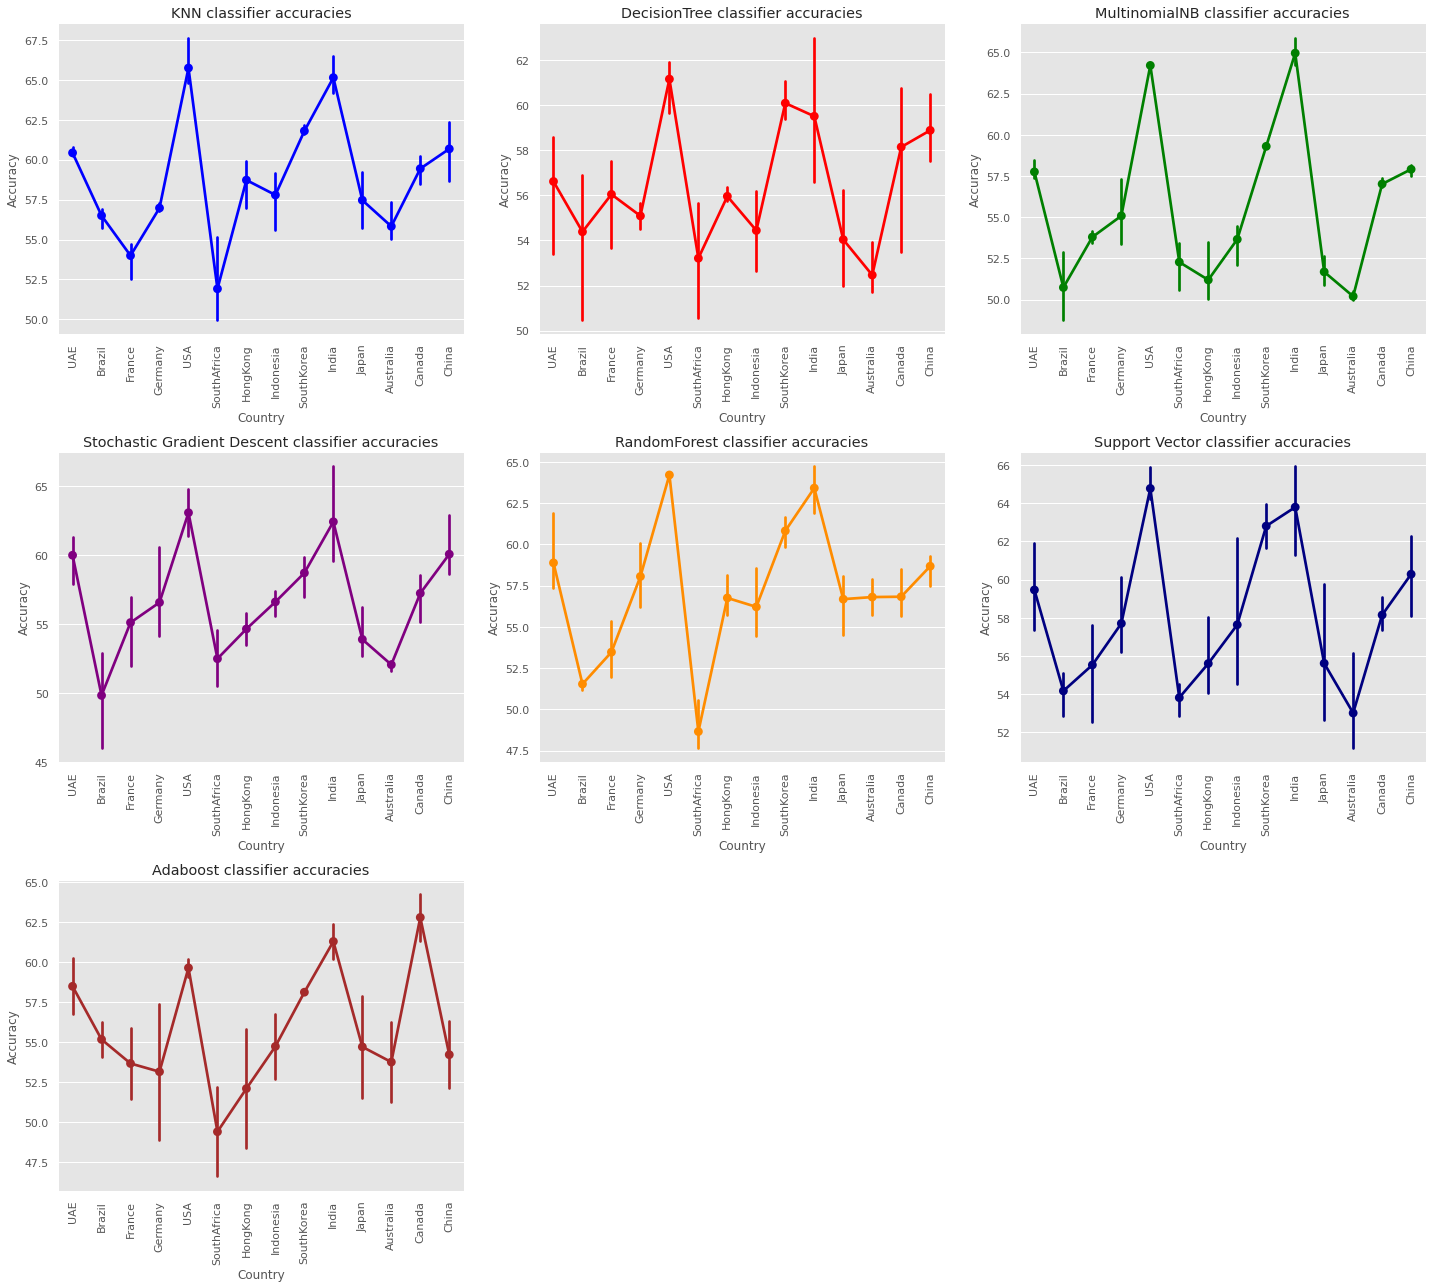

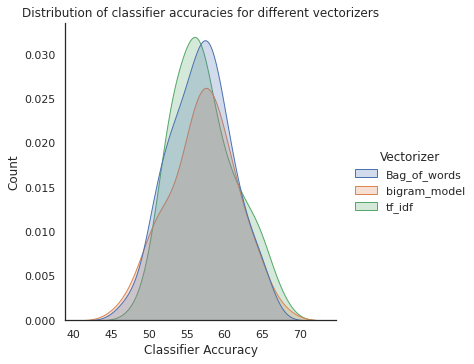

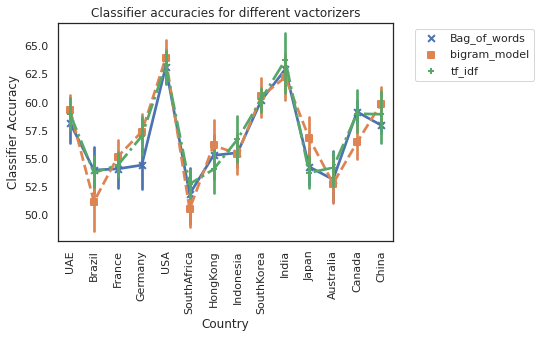

In [ ]:
#VisualizeHeadlinesData.ipynb

# Sai Madhuri Yerramsetti
# November 30, 2020
# Student Number: 0677671

# import required packages
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

# To disable warnings which arise from chained assignment
pd.options.mode.chained_assignment = None

# Function to display various graphs
def visualize_headlines_data():
    
    # Read the file
    corona_news = pd.read_csv('corona_headlines.csv')

    # read the stock market data from csv
    stock_prices = pd.read_csv('stock_prices_merged.csv')

    # read the covid cases from csv
    covid_cases = pd.read_csv('Covid.csv')

    # read the pre-processed headlines data
    clean_data = pd.read_csv('final_data.csv')

    # read the accuracy data of ML algorithms from csv files
    bow_acc = pd.read_csv('acc_data_BoW.csv')
    bigram_acc = pd.read_csv('acc_data_BiGrams.csv')
    tf_idf_acc = pd.read_csv('acc_data_TfIdf.csv')
    svm_ada_bow = pd.read_csv('acc_data_svm_adaboost_bow.csv')
    svm_bigram = pd.read_csv('acc_data_svm_bigram.csv')
    svm_ada_tfidf = pd.read_csv('acc_data_svm_adaboost_tfidf.csv')
    lstm_embedding_acc = pd.read_csv('acc_data_LSTMEmbedding.csv')

    # Change datatype of Date column
    covid_cases['Date'] = pd.to_datetime(covid_cases['Date'])
    covid_cases.sort_values(by='Date')

    # Impute missing values with 0
    covid_cases = covid_cases.fillna(0)
    print("final data null values: ", covid_cases.isnull().sum())

    # Change the data string into datetime object
    stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])

    # Change datatype of Date column
    clean_data['Date'] = pd.to_datetime(clean_data['Date'])
    clean_data.sort_values(by='Date')

    # Convert the Date column to datetime type, sort the values and check for any null values
    corona_news['Date'] = pd.to_datetime(corona_news['Date'], format='%Y%m%d')
    corona_news.sort_values(by='Date')
    print("Corona news data before combining strings: \n", corona_news.head(5))

    # get world covid data for 2020 year into new dataframe and add a new column for new cases count
    world_cases=covid_cases[covid_cases['Country'] == 'World']
    world_cases = world_cases[world_cases['Date'] > '2019-12-31']
    world_cases['NewCases'] = world_cases['ActiveCases'].diff()
    world_cases.dropna(subset = ["NewCases"], inplace=True) # drop missing values
    print(world_cases.head(15))

    # plot lineplot for New Covid active cases count per day around the world
    plt.style.use('ggplot')
    sns.lineplot(data=world_cases, x="Date", y="NewCases")
    plt.xlabel("Date") #set the axis labels
    plt.ylabel("New active cases Count") #set the axis labels
    plt.title("New Covid active cases count per day around the world") #set the title of the plot
    plt.xticks(rotation=90) #rotate the x-axis ticks through 90 degrees
    plt.show()

    # Create new column "Month" and get monthly headline count in new dataframe
    corona_news['Month'] = pd.DatetimeIndex(corona_news['Date']).month
    headlines_month_count = corona_news.groupby('Month', as_index=False).agg({"News": "count"})
    print(headlines_month_count.head(5))

    # Get count of headlines for each date in a new dataframe
    headlines_date_count = corona_news.groupby('Date', as_index=False).agg({"News": "count"})
    print(headlines_date_count.head(5))

    # Create new columns for headline length and headline word count
    corona_news['HeadlineLength'] = corona_news['News'].apply(lambda x : len(x))
    corona_news['WordCount'] = corona_news['News'].apply(lambda x: len(x.split()))

    # Calculate average word count of headlines per each date
    average_word_count = corona_news.groupby('Date', as_index=False).agg({"WordCount": np.average})
    print(average_word_count.head(5))

    # Plot a graph for ditribution of average word count of headlines before preprocessing
    sns.set(style="white")
    sns.displot(average_word_count, x="WordCount",  kde=True)
    plt.xlabel("Average headline word count")  #set the axis labels
    plt.ylabel("Count")  #set the axis labels
    plt.title("Distribution of average Covid headlines word count before preprocessing")  #set the title of the plot
    plt.show()

    # get word count of preprocessed headlines in a new column
    model_data = clean_data[clean_data['Country'] == 'Canada']
    model_data['WordCount'] = model_data['News'].apply(lambda x: len(x.split()))
    print(model_data.head(5))

    # Plot a graph for ditribution of word count of headlines after preprocessing
    sns.set(style="white")
    sns.displot(model_data, x="WordCount",  kind="kde", fill=True)
    plt.xlabel("Headline word count")  #set the axis labels
    plt.ylabel("Count")  #set the axis labels
    plt.title("Distribution of Covid headlines word count after preprocessing")  #set the title of the plot
    plt.show()

    # Plot a graph for ditribution of length of headlines before preprocessing
    sns.set(style="white")
    sns.displot(corona_news, x="HeadlineLength", binwidth=3)
    plt.xlabel("Length of headlines")  #set the axis labels
    plt.ylabel("Count")  #set the axis labels
    plt.title("Distribution of Covid headlines length before preprocessing")  #set the title of the plot
    plt.show()

    # Plot a graph for headlines count vs Date
    plt.style.use('ggplot')
    sns.lineplot(data=headlines_date_count, x="Date", y="News")
    plt.xlabel("Date")  #set the axis labels
    plt.ylabel("Headlines count")  #set the axis labels
    plt.title("Covid Headlines count per date")  #set the title of the plot
    plt.xticks(rotation=90) #rotate the x-axis ticks through 90 degrees
    plt.show()

    # Plot a graph for headlines count vs Date
    plt.style.use('ggplot')
    sns.lineplot(data=headlines_month_count, x="Month", y="News")
    plt.xlabel("Month")  #set the axis labels
    plt.ylabel("Headlines count")  #set the axis labels
    plt.title("Covid Headlines count per month")  #set the title of the plot
    plt.axvline(x = 2.0, ymin = 0, ymax = 75000, color ='green', linestyle='--')  #draw a vertical line near the surge of headlines
    plt.show()

    # Remove the extra ',' string from the '% Change' column values and convert them to numeric values
    stock_prices['Price'] = stock_prices['Price'].str.replace(r',', '')
    stock_prices[["Price"]] = stock_prices[["Price"]].apply(pd.to_numeric)

    # create a new column for log price
    stock_prices['log_price'] = np.log10(stock_prices['Price'])

    # create a lineplot for log price vs Date for all countries
    sns.lineplot(data=stock_prices, x="Date", y="log_price", hue="Country")
    plt.xlabel("Date")  #set the axis labels
    plt.ylabel("Log Price")  #set the axis labels
    plt.title("Log Stock Price vs Date for all countries")  #set the title of the plot
    plt.xticks(rotation=90) #rotate the x-axis ticks through 90 degrees
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #set legend position outside the plot
    plt.axvline(x = pd.to_datetime('2020-03'), color ='black', linestyle='--')  #draw a vertical line near the drop of stock price
    plt.show()

    # draw a countplot of the 'Label' column
    sns.countplot(x='Label', data=clean_data)

    # merge the accuracies of svm and adaboost classifiers (they were taken seperately) with rest of the classifier accuracies
    bow_acc =  pd.merge(bow_acc, svm_ada_bow, on=['Country'], how='inner')
    tf_idf_acc =  pd.merge(tf_idf_acc, svm_ada_tfidf, on=['Country'], how='inner')
    bigram_acc =  pd.merge(bigram_acc, svm_bigram, on=['Country'], how='inner')

    # add a new column in each accuracy dataframe for the type of vectorizer
    bow_acc['Vectorizer'] = 'Bag_of_words'
    bigram_acc['Vectorizer'] = 'bigram_model'
    tf_idf_acc['Vectorizer'] = 'tf_idf'

    # Merge all vectorizer accuracies into single file and make new column for type classifier
    accuracy_data = bow_acc.append(bigram_acc, ignore_index = True) 
    accuracy_data = accuracy_data.append(tf_idf_acc, ignore_index = True)
    accuracy_data = accuracy_data.melt(id_vars =['Country', 'Vectorizer'], 
                                        value_vars =["KNN", "DecisionTree", "MultinomialNB", "SGD", "RandomForest", "SVM", "Adaboost"], 
                                        var_name ='Classifier', value_name ='Accuracy')
    
    # Multiply accuracies with 100
    accuracy_data['Accuracy'] = accuracy_data['Accuracy'].apply(lambda x: x*100)
    print(accuracy_data.head(5))

    # Check the country-wise best accuracies
    print("Country-wise best accuracies:") 
    print(accuracy_data.iloc[accuracy_data.groupby('Country')['Accuracy'].agg(pd.Series.idxmax)])

    # Check classifier-wise best accuracies
    print("Classifier-wise best accuracies:") 
    print(accuracy_data.iloc[accuracy_data.groupby('Classifier')['Accuracy'].agg(pd.Series.idxmax)])

    # Check Vectorizer-wise best accuracies
    print("Vectorizer-wise best accuracies:") 
    print(accuracy_data.iloc[accuracy_data.groupby('Vectorizer')['Accuracy'].agg(pd.Series.idxmax)])

    # set the style of the graph to white and plot a boxplot for Distribution of accuracies of different classifiers
    sns.set(style="white")
    plt.figure(figsize=(15,10))
    sns.boxplot(x="Classifier", y="Accuracy",
            hue="Vectorizer", 
            data=accuracy_data,
            showmeans = True)
    plt.xlabel("Machine learning Classifier") #set the axis labels
    plt.ylabel("Accuracy of the model") #set the axis labels
    plt.title("Distribution of accuracies of different classifiers") #set the title of the plot
    plt.show()

    # set the style of the graph to white and plot a boxplot for Distribution of accuracies of different vectorizers
    sns.set(style="white")
    plt.figure(figsize=(15,10))
    sns.boxplot(x="Vectorizer", y="Accuracy",
            hue="Classifier", 
            data=accuracy_data,
            showmeans = True)
    plt.xlabel("Vectorizer Type") #set the axis labels
    plt.ylabel("Accuracy of the model") #set the axis labels
    plt.title("Distribution of accuracies of different vectorizers") #set the title of the plot
    plt.show()


    # subplots for various classifier accuracies for all countries considered
    plt.style.use('ggplot')
    fig, axes = plt.subplots(3, 3, figsize=(20, 18)) #set the plot size
    sns.pointplot(ax=axes[0, 0], data=accuracy_data[accuracy_data['Classifier'] == 'KNN'], x='Country', y='Accuracy', color='blue')
    sns.pointplot(ax=axes[0, 1], data=accuracy_data[accuracy_data['Classifier'] == 'DecisionTree'], x='Country', y='Accuracy', color='red')
    sns.pointplot(ax=axes[0, 2], data=accuracy_data[accuracy_data['Classifier'] == 'MultinomialNB'], x='Country', y='Accuracy', color='green')
    sns.pointplot(ax=axes[1, 0], data=accuracy_data[accuracy_data['Classifier'] == 'SGD'], x='Country', y='Accuracy', color='purple')
    sns.pointplot(ax=axes[1, 1], data=accuracy_data[accuracy_data['Classifier'] == 'RandomForest'], x='Country', y='Accuracy', color='darkorange')
    sns.pointplot(ax=axes[1, 2], data=accuracy_data[accuracy_data['Classifier'] == 'SVM'], x='Country', y='Accuracy', color='navy')
    sns.pointplot(ax=axes[2, 0], data=accuracy_data[accuracy_data['Classifier'] == 'Adaboost'], x='Country', y='Accuracy', color='brown')
    axes[2, 1].set_axis_off() #turn off the axis for plot in 2,1 position
    axes[2, 2].set_axis_off() #turn off the axis for plot in 2,2 position
    axes[0, 0].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[0, 1].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[0, 2].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[1, 0].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[1, 1].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[1, 2].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[2, 0].tick_params(axis='x', rotation=90) #rotate the x-axis ticks through 90 degrees
    axes[0, 0].set_title('KNN classifier accuracies') #set the title of the subplot
    axes[0, 1].set_title('DecisionTree classifier accuracies') #set the title of the subplot
    axes[0, 2].set_title('MultinomialNB classifier accuracies') #set the title of the subplot
    axes[1, 0].set_title('Stochastic Gradient Descent classifier accuracies') #set the title of the subplot
    axes[1, 1].set_title('RandomForest classifier accuracies') #set the title of the subplot
    axes[1, 2].set_title('Support Vector classifier accuracies') #set the title of the subplot
    axes[2, 0].set_title('Adaboost classifier accuracies') #set the title of the subplot
    plt.tight_layout() #Adjust the layout of the plot automatically
    plt.show()

    # plot for Distribution of classifier accuracies for different vectorizers
    sns.set(style="white")
    sns.displot(accuracy_data, x="Accuracy",  kind="kde", fill=True, hue='Vectorizer')
    plt.xlabel("Classifier Accuracy")  #set the axis labels
    plt.ylabel("Count")  #set the axis labels
    plt.title("Distribution of classifier accuracies for different vectorizers")  #set the title of the plot
    plt.show()

  # pointplot for Classifier accuracies for different vactorizers
    sns.pointplot(data=accuracy_data, x='Country', y='Accuracy', hue='Vectorizer',
                 markers=["x", "s", "+"],
                linestyles=["-", "--", "-."])
    plt.xlabel("Country")  #set the axis labels
    plt.ylabel("Classifier Accuracy")  #set the axis labels
    plt.title("Classifier accuracies for different vactorizers")  #set the title of the plot
    plt.xticks(rotation=90) #rotate the x-axis ticks through 90 degrees
    plt.legend(loc='upper left',  bbox_to_anchor=(1.05, 1)) #set the location of the legend
    plt.show()

    
if __name__ == "__main__":
    visualize_headlines_data()
